In [ ]:
import os
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# 数据加载
df = pd.read_feather("newdf.feather")
# 2. 时间和星期信息处理
df['date'] = pd.to_datetime(df['date'])
# 用 pandas 的 dt.weekday（0=周一，4=周五，6=周日）
df['is_friday'] = (df['date'].dt.weekday == 4).astype(int)
# 特征与目标列
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]
feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]


# 删除含有缺失值的行
df.dropna(subset=target_columns + feature_columns, inplace=True)

# 创建模型保存目录
os.makedirs("saved_models", exist_ok=True)

# 超参数网格
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200]
}

# 遍历每个因变量进行建模
for target in target_columns:
    print(f"===== {target} =====")
    X = df[feature_columns]
    y = df[target]

    # 划分训练/验证集
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    # 初始化模型
    model = CatBoostRegressor(
        verbose=0,
        random_seed=42
    )

    # 网格搜索
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    
    # 把 Is_Friday（第 0 列）当作分类特征
    grid_search.fit(X_train, y_train, cat_features=[0])
    best_model = grid_search.best_estimator_

    # 保存模型
    best_model.save_model(f"saved_models/{target}.cbm")

    # 显示训练与验证分数
    train_score = best_model.score(X_train, y_train)
    val_score   = best_model.score(X_val, y_val)
    print("最优参数:", grid_search.best_params_)
    print(f"训练 R²: {train_score:.3f}")
    print(f"验证 R²: {val_score:.3f}")

    # 特征重要性
    importances = pd.Series(
        best_model.feature_importances_,
        index=X.columns
    )
    print("特征重要性：")
    print(importances.sort_values(ascending=False))
    print()
    

===== pale_ale_bottles =====
最优参数: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.640
验证 R²: 0.452
特征重要性：
is_friday                    38.273724
apparent_temperature_mean    23.030166
shortwave_radiation_sum      20.628330
precipitation_sum            18.067780
dtype: float64

===== lager_bottles =====
最优参数: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.747
验证 R²: 0.633
特征重要性：
is_friday                    36.968954
apparent_temperature_mean    27.559164
shortwave_radiation_sum      18.072228
precipitation_sum            17.399654
dtype: float64

===== ipa_bottles =====
最优参数: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.652
验证 R²: 0.568
特征重要性：
is_friday                    36.216076
apparent_temperature_mean    24.622631
shortwave_radiation_sum      23.325797
precipitation_sum            15.835496
dtype: float64

===== white_beer_bottles =====
最优参数: {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.679
验证 R²: 0.610
特征重要性

===== pale_ale_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.640
验证 R²: 0.452


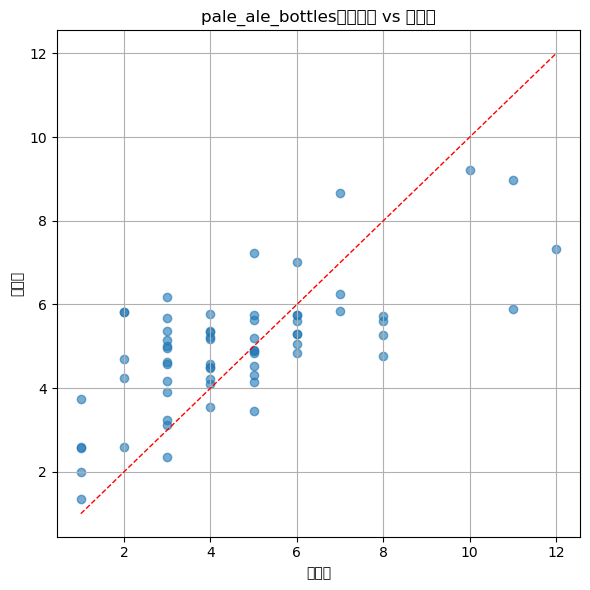

特征重要性：
is_friday                    38.273724
apparent_temperature_mean    23.030166
shortwave_radiation_sum      20.628330
precipitation_sum            18.067780
dtype: float64

===== lager_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.747
验证 R²: 0.633


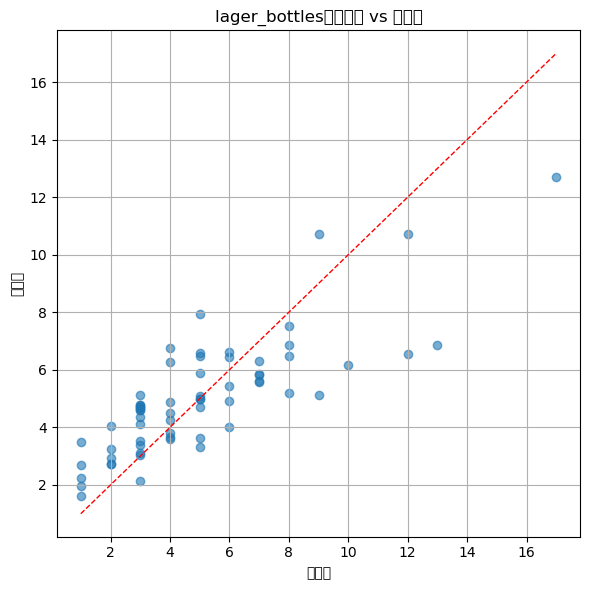

特征重要性：
is_friday                    36.968954
apparent_temperature_mean    27.559164
shortwave_radiation_sum      18.072228
precipitation_sum            17.399654
dtype: float64

===== ipa_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.652
验证 R²: 0.568


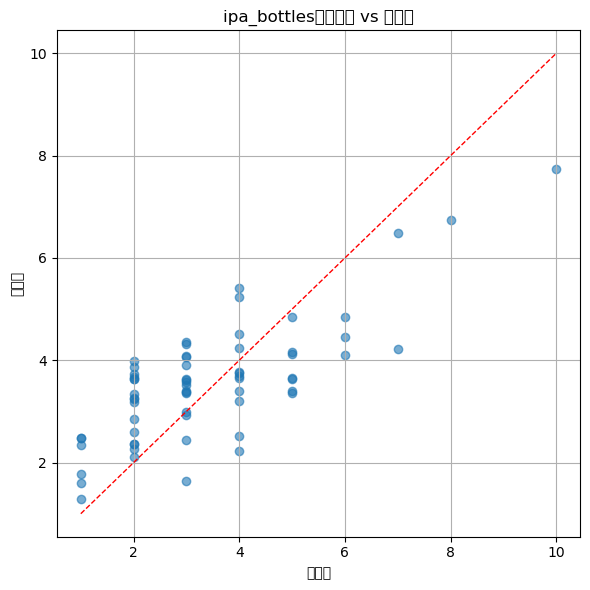

特征重要性：
is_friday                    36.216076
apparent_temperature_mean    24.622631
shortwave_radiation_sum      23.325797
precipitation_sum            15.835496
dtype: float64

===== white_beer_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.679
验证 R²: 0.610


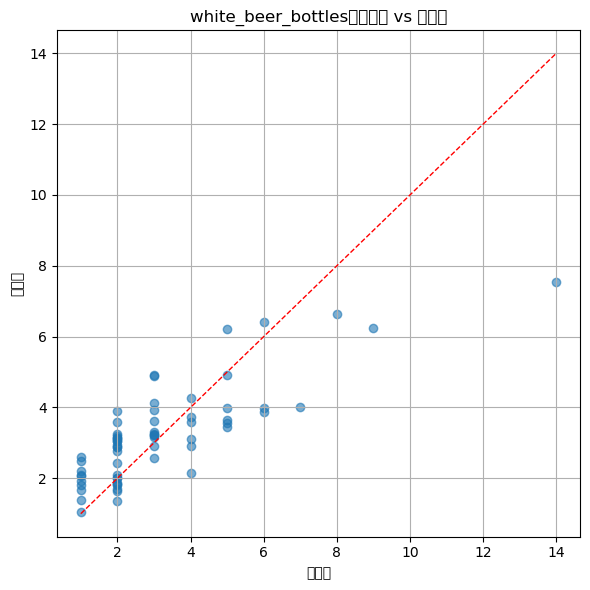

特征重要性：
apparent_temperature_mean    35.520123
is_friday                    33.520132
shortwave_radiation_sum      18.399387
precipitation_sum            12.560358
dtype: float64

===== dark_beer_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.663
验证 R²: 0.384


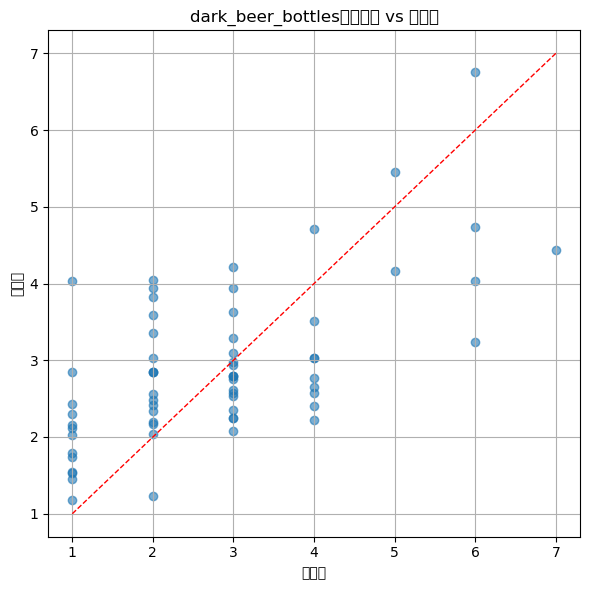

特征重要性：
apparent_temperature_mean    40.185034
is_friday                    25.512123
shortwave_radiation_sum      17.287827
precipitation_sum            17.015015
dtype: float64

===== fruit_beer_bottles =====
最优参数： {'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
训练 R²: 0.434
验证 R²: 0.201


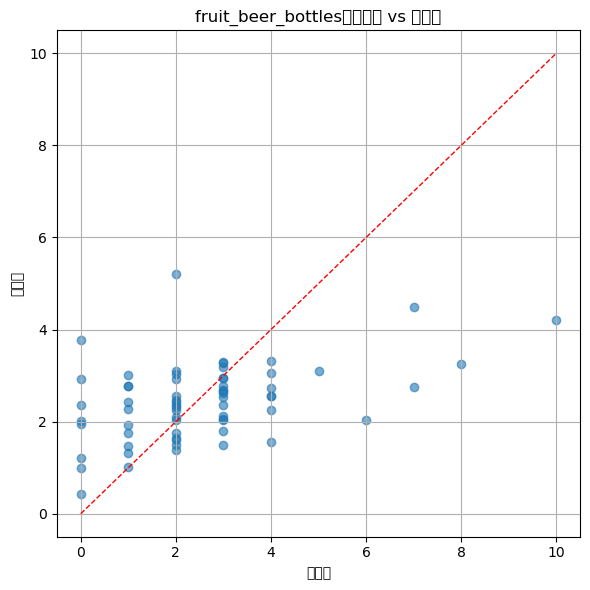

特征重要性：
shortwave_radiation_sum      32.698018
apparent_temperature_mean    30.252862
is_friday                    23.852969
precipitation_sum            13.196150
dtype: float64



In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. 数据加载
df = pd.read_feather("newdf.feather")

# 2. 日期和星期信息处理
df['date'] = pd.to_datetime(df['date'])
df['is_friday'] = (df['date'].dt.weekday == 4).astype(int)

# 3. 定义特征列和目标列（预测数量）
feature_columns = [
    'is_friday',
    'apparent_temperature_mean',
    'precipitation_sum',
    'shortwave_radiation_sum'
]
target_columns = [
    'pale_ale_bottles',
    'lager_bottles',
    'ipa_bottles',
    'white_beer_bottles',
    'dark_beer_bottles',
    'fruit_beer_bottles'
]

# 4. 删除缺失值
df.dropna(subset=feature_columns + target_columns, inplace=True)

# 5. 创建保存模型的目录
os.makedirs("saved_models", exist_ok=True)

# 6. 超参数网格
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'iterations': [200]
}

# 7. 循环针对每个目标建模并绘图
for target in target_columns:
    print(f"===== {target} =====")
    X = df[feature_columns]
    y = df[target]

    # 划分训练/验证集
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 初始化 CatBoost 回归器
    model = CatBoostRegressor(verbose=0, random_seed=42)

    # 网格搜索
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train, cat_features=[0])
    best_model = grid_search.best_estimator_

    # 保存模型
    best_model.save_model(f"saved_models/{target}.cbm")

    # 输出分数
    train_r2 = best_model.score(X_train, y_train)
    val_r2   = best_model.score(X_val, y_val)
    print("最优参数：", grid_search.best_params_)
    print(f"训练 R²: {train_r2:.3f}")
    print(f"验证 R²: {val_r2:.3f}")

    # 绘制真实值 vs 预测值 散点图
    y_pred = best_model.predict(X_val)
    plt.figure(figsize=(6,6))
    plt.scatter(y_val, y_pred, alpha=0.6)
    plt.plot([y_val.min(), y_val.max()],
             [y_val.min(), y_val.max()],
             'r--', linewidth=1)
    plt.xlabel("真实值")
    plt.ylabel("预测值")
    plt.title(f"{target}：真实值 vs 预测值")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 输出特征重要性
    importances = pd.Series(
        best_model.feature_importances_, index=feature_columns
    )
    print("特征重要性：")
    print(importances.sort_values(ascending=False))
    print()
